<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/0824_DeepLearning(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [16]:
# 주어진 데이터
시간 = [2, 4, 6, 8]
점수 = [80, 90, 88, 92]

# 최소제곱법에 따라 기울기와 절편을 계산합니다

n = len(시간)

# 각 항목의 합을 계산합니다
sum_x = sum(시간)
sum_y = sum(점수)
sum_xy = sum(x*y for x, y in zip(시간, 점수))
sum_x_squared = sum(x**2 for x in 시간)

# 기울기와 절편을 계산합니다
m_least_squares = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b_least_squares = (sum_y - m_least_squares * sum_x) / n

m_least_squares, b_least_squares

(1.7, 79.0)

In [17]:
# 예측된 점수를 계산합니다
예측된_점수 = [m_least_squares * t + b_least_squares for t in 시간]

# 평균 제곱 오차를 계산합니다
MSE = sum((y_pred - y_true)**2 for y_pred, y_true in zip(예측된_점수, 점수)) / n

MSE

6.300000000000013

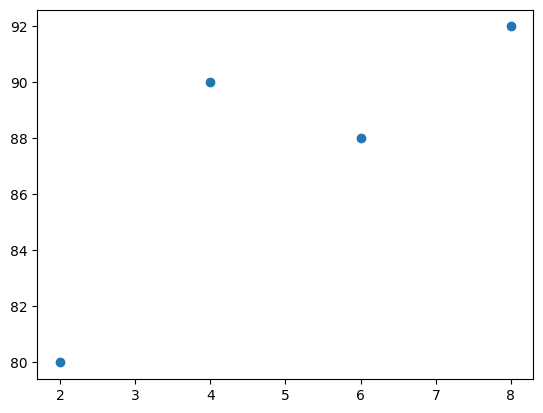

epoch=0, 기울기=26.7600, 절편=5.2500
epoch=50, 기울기=9.4967, 절편=32.4952
epoch=100, 기울기=6.4800, 절편=50.4752
epoch=150, 기울기=4.6319, 절편=61.5039
epoch=200, 기울기=3.4983, 절편=68.2685
epoch=250, 기울기=2.8030, 절편=72.4177
epoch=300, 기울기=2.3765, 절편=74.9627
epoch=350, 기울기=2.1150, 절편=76.5236
epoch=400, 기울기=1.9545, 절편=77.4811
epoch=450, 기울기=1.8561, 절편=78.0684
epoch=500, 기울기=1.7958, 절편=78.4286
epoch=550, 기울기=1.7587, 절편=78.6495
epoch=600, 기울기=1.7360, 절편=78.7850
epoch=650, 기울기=1.7221, 절편=78.8681
epoch=700, 기울기=1.7136, 절편=78.9191
epoch=750, 기울기=1.7083, 절편=78.9504
epoch=800, 기울기=1.7051, 절편=78.9696
epoch=850, 기울기=1.7031, 절편=78.9813
epoch=900, 기울기=1.7019, 절편=78.9886
epoch=950, 기울기=1.7012, 절편=78.9930


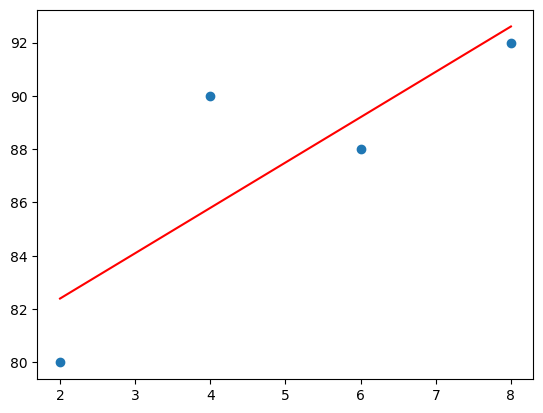

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#공부 시간 X와 성적 Y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([80, 90, 88, 92])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.03

#몇 번 반복될지를 설정합니다.
epochs = 1000

# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
  y_pred = a * x + b                   # 예측 값을 구하는 식입니다.
  error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.

  a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
  b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

  a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
  b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

  if i % 50 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

#앞서 구한 최종 a값을 기울기, b값을 y절편에 대입하여 그래프를 그립니다.
y_pred = a * x + b

#그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

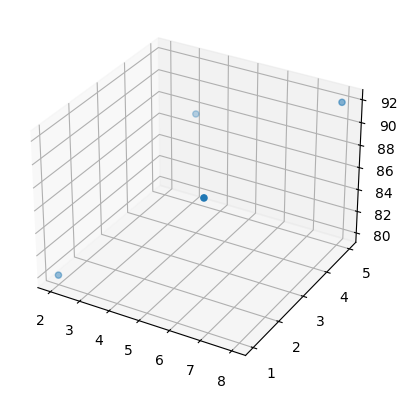

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#공부 시간 x1과 과외 시간 x2, 그성적 y의 넘파이 배열을 만듭니다.
x1 = np.array([2, 4, 6, 8])
x2 = np.array([1, 4, 2, 5])
y = np.array([80, 90, 88, 92])

# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [20]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

#학습률을 정합니다.
lr = 0.01

#몇 번 반복될지를 설정합니다.
epochs = 1000

# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n=len(x1)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복

    y_pred = a1 * x1 + a2 * x2 + b       #예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   #실제 값과 비교한 오차를 error로 놓습니다.

    a1_diff = (2/n) * sum(-x1 * (error)) # 오차함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차함수를 b로 편미분한 값입니다.

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 50 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

#실제 점수와 예측 된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

epoch=0, 기울기1=8.9200, 기울기2=5.3800, 절편=1.7500
epoch=50, 기울기1=9.2998, 기울기2=5.8517, 절편=13.1915
epoch=100, 기울기1=8.0474, 기울기2=5.2729, 절편=22.6907
epoch=150, 기울기1=6.9834, 기울기2=4.7701, 절편=30.7998
epoch=200, 기울기1=6.0773, 기울기2=4.3375, 절편=37.7223
epoch=250, 기울기1=5.3044, 기울기2=3.9669, 절편=43.6316
epoch=300, 기울기1=4.6450, 기울기2=3.6501, 절편=48.6761
epoch=350, 기울기1=4.0822, 기울기2=3.3794, 절편=52.9823
epoch=400, 기울기1=3.6019, 기울기2=3.1483, 절편=56.6583
epoch=450, 기울기1=3.1918, 기울기2=2.9510, 절편=59.7963
epoch=500, 기울기1=2.8417, 기울기2=2.7826, 절편=62.4751
epoch=550, 기울기1=2.5429, 기울기2=2.6388, 절편=64.7618
epoch=600, 기울기1=2.2878, 기울기2=2.5160, 절편=66.7139
epoch=650, 기울기1=2.0701, 기울기2=2.4112, 절편=68.3803
epoch=700, 기울기1=1.8842, 기울기2=2.3218, 절편=69.8028
epoch=750, 기울기1=1.7255, 기울기2=2.2454, 절편=71.0171
epoch=800, 기울기1=1.5901, 기울기2=2.1802, 절편=72.0537
epoch=850, 기울기1=1.4745, 기울기2=2.1246, 절편=72.9386
epoch=900, 기울기1=1.3757, 기울기2=2.0771, 절편=73.6939
epoch=950, 기울기1=1.2915, 기울기2=2.0365, 절편=74.3388
실제 점수: [80 90 88 92]
예측 점수: [79.3164838  87.

In [22]:
x = np.array([[2,1],[4,4],[6,2],[8,5]])

In [23]:
x

array([[2, 1],
       [4, 4],
       [6, 2],
       [8, 5]])

In [24]:
# 딥러닝 모델을 만들거야!

model = Sequential()

In [25]:
# 입력변수가 2개를 가지고 있고, 노드는 1개로 구성된 모델을 만들거야!

model.add(Dense(1, input_dim = 2, activation = 'linear'))

In [26]:
# 최적값에 대해서 수행해보자

model.compile(optimizer='sgd', loss = 'mse')

### 로지스틱 회귀모델

In [30]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [31]:
model = Sequential()

In [32]:
model.add(Dense(1, input_dim=1, activation='sigmoid'))

In [33]:
# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정

model.compile(optimizer='sgd' ,loss='binary_crossentropy')

In [38]:
model.fit(x, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1725
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1725
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1725
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1724
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.1724
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1724
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1724
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1724
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1724
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1724
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1723
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1723
Epoch 13/1000
1/1 [====================

1/1 [==============================] - 0s 85ms/step


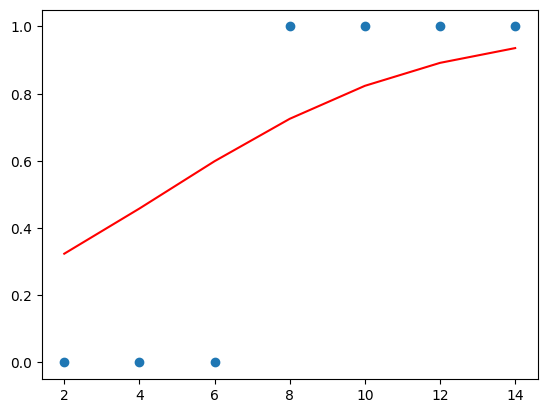

In [35]:
#그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

### 임의의 학습시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
### 닉네임/병명/확진년도/성별/관심사

In [36]:
hour = 7
prediction = model.predict([hour])

1/1 [==============================] - 0s 39ms/step


In [40]:
print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

7시간을 공부할 경우, 합격 예상 확률은 58.5%입니다
